In [58]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.compose import ColumnTransformer
import matplotlib
from matplotlib import pylab as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

import matplotlib
#uncomment to move directories
#import os
# os.chdir('..')
# os.chdir('Project_1030')
# os.getcwd()

df = pd.read_csv('./data/clean_data.csv')
del df['Unnamed: 0']
df.head()

,state,n_outbreaks,perc_vacc,white_alone,black_alone,AI_AN_alone,asian_alone,PI_alone,other_race_alone,mult_races,...,4_person_household,5_person_household,6_person_household,7_more_person_household,total_avg_size,owner_avg_size,renter_avg_size,avg_age,avg_age_male,avg_age_female
0,Maine_1999,45,43.7,1236014.0,6760.0,7098.0,9111.0,382.0,2911.0,12647.0,...,69418.0,25602.0,7253.0,2931.0,2.39,2.54,2.03,38.6,37.6,39.6
1,Massachusetts_1999,427,65.0,5367286.0,343454.0,15015.0,238124.0,2489.0,236724.0,146005.0,...,353184.0,154831.0,50905.0,26020.0,2.51,2.72,2.17,36.5,35.4,37.7
2,Rhode Island_1999,25,78.4,891191.0,46908.0,5121.0,23665.0,567.0,52616.0,28251.0,...,57638.0,24253.0,7804.0,3963.0,2.47,2.66,2.19,36.7,35.4,38.0
3,Ohio_1999,1307,52.5,9645453.0,1301307.0,24486.0,132633.0,2749.0,88627.0,157885.0,...,612614.0,269997.0,88970.0,44464.0,2.49,2.62,2.19,36.2,34.9,37.5
4,Illinois_1999,13846,45.4,9125471.0,1876875.0,31006.0,423603.0,4610.0,722712.0,235016.0,...,660575.0,330510.0,128726.0,95554.0,2.63,2.76,2.37,34.7,33.3,36.0


In [48]:
X = df.loc[:,df.columns != 'n_outbreaks']
X = X.loc[:,X.columns != 'state']
y = df['n_outbreaks']



In [8]:
def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    scaler = StandardScaler()
    pipe = make_pipeline(scaler,Ridge())
    # the parameter(s) we want to tune
    param_grid = {'ridge__alpha': np.logspace(-3,4,num=8)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(mean_squared_error,greater_is_better=False),
                        cv=kf, return_train_score = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [9]:
grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,42,5)
results = pd.DataFrame(grid.cv_results_)
print('CV MSE:',-np.around(results[results['rank_test_score'] == 1]['mean_test_score'].values[0],2),\
      '+/-',np.around(results[results['rank_test_score'] == 1]['std_test_score'].values[0],2))
print('test MSE:',-np.around(test_score,2))
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_index_)
results

CV MSE: 1577482.12 +/- 847017.94
test MSE: 584061.87
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
-1577482.1152995736
1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005085,0.000883,0.001489,0.000085,0.001,{'ridge__alpha': 0.001},-1.637374e+06,-1.656118e+06,-1.089494e+06,-487859.723124,...,-1.578298e+06,8.387968e+05,2,-1.281820e+06,-1.301476e+06,-1.411278e+06,-1.554201e+06,-9.924389e+05,-1.308243e+06,185249.884866
1,0.004572,0.000105,0.014731,0.026622,0.01,{'ridge__alpha': 0.01},-1.636705e+06,-1.630245e+06,-1.111173e+06,-469986.987447,...,-1.577482e+06,8.470179e+05,1,-1.287904e+06,-1.308479e+06,-1.415517e+06,-1.561593e+06,-9.951291e+05,-1.313724e+06,186546.298054
2,0.003669,0.000513,0.001056,0.000030,0.1,{'ridge__alpha': 0.1},-1.711970e+06,-1.640076e+06,-1.217316e+06,-447515.302576,...,-1.632623e+06,8.802655e+05,3,-1.330896e+06,-1.366898e+06,-1.462604e+06,-1.628014e+06,-1.041499e+06,-1.365982e+06,192102.821380
3,0.003317,0.000175,0.001075,0.000068,1,{'ridge__alpha': 1.0},-1.884058e+06,-1.753931e+06,-1.400181e+06,-462032.775485,...,-1.752838e+06,9.045816e+05,4,-1.439341e+06,-1.495018e+06,-1.565710e+06,-1.776696e+06,-1.147843e+06,-1.484922e+06,203696.116520
4,0.003392,0.000175,0.001151,0.000108,10,{'ridge__alpha': 10.0},-1.958639e+06,-1.936336e+06,-1.567285e+06,-558791.003795,...,-1.863834e+06,8.789189e+05,5,-1.569700e+06,-1.639689e+06,-1.704086e+06,-1.947208e+06,-1.311914e+06,-1.634519e+06,205385.455739
5,0.003469,0.000164,0.001093,0.000025,100,{'ridge__alpha': 100.0},-2.112450e+06,-2.235284e+06,-1.684080e+06,-676929.993197,...,-2.032028e+06,8.966319e+05,6,-1.830077e+06,-1.818449e+06,-1.948568e+06,-2.197432e+06,-1.566943e+06,-1.872294e+06,204672.056880
6,0.003339,0.000093,0.001039,0.000013,1000,{'ridge__alpha': 1000.0},-2.618093e+06,-2.598801e+06,-1.726057e+06,-728422.845059,...,-2.301964e+06,1.035040e+06,7,-2.156338e+06,-2.156845e+06,-2.347409e+06,-2.606308e+06,-1.888469e+06,-2.231074e+06,237826.780338
7,0.003491,0.000316,0.001038,0.000012,10000,{'ridge__alpha': 10000.0},-3.056253e+06,-3.147640e+06,-2.011431e+06,-957747.437360,...,-2.691114e+06,1.126124e+06,8,-2.553518e+06,-2.554509e+06,-2.831553e+06,-3.102638e+06,-2.272810e+06,-2.663006e+06,282026.978951


In [10]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'ridge__alpha': arra

In [11]:
def ML_pipeline_kfold_GridSearchCV_lasso_ver(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    scaler = StandardScaler()
    pipe = make_pipeline(scaler,Lasso())
    # the parameter(s) we want to tune
    param_grid = {'lasso__alpha': np.logspace(-3,4,num=10), 'lasso__max_iter':[200000]}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(mean_squared_error,greater_is_better=False),
                        cv=kf, return_train_score = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)


def ML_pipeline_kfold_GridSearchCV_svc(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    scaler = StandardScaler()
    pipe = make_pipeline(scaler,SVC())
    # the parameter(s) we want to tune
    param_grid = {'svc__C': np.logspace(-3,4,num=8),'svc__gamma': np.logspace(-3,4,num=8)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [12]:
grid2, test_score2 = ML_pipeline_kfold_GridSearchCV_lasso_ver(X,y,42,5)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221432219.27887225, tolerance: 103013.84914320653
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223923796.4838364, tolerance: 101586.45583668478
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244384682.60400894, tolerance: 113254.49606711957
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273910623.9

In [13]:
results = pd.DataFrame(grid2.cv_results_)
# print('CV MSE:',-np.around(results[results['rank_test_score'] == 1]['mean_test_score'].values[0],2),\
#       '+/-',np.around(results[results['rank_test_score'] == 1]['std_test_score'].values[0],2))
# print('test MSE:',-np.around(test_score,2))
print(grid.best_estimator_)
#print(grid2.best_estimator_)
#print(grid.best_score_)v5
#print(grid2.best_score_)
# print(grid2.best_index_)
#results.params
grid.best_estimator_.fit(X,y).named_steps

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)


{'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'ridge': Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)}

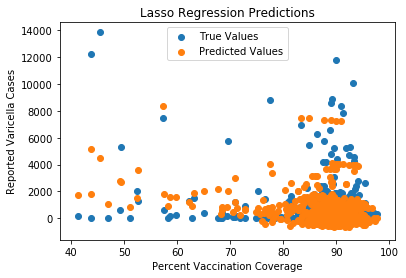

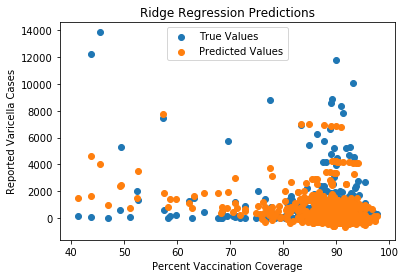

In [14]:
a = plt.scatter(X['perc_vacc'],y)
b = plt.scatter(X['perc_vacc'], grid2.best_estimator_.predict(X))
plt.legend((a,b), ("True Values", "Predicted Values"))
plt.title("Lasso Regression Predictions")
plt.xlabel("Percent Vaccination Coverage")
plt.ylabel("Reported Varicella Cases")
plt.savefig('figures/scatter_lasso.png',dpi=300)
plt.show()

a = plt.scatter(X['perc_vacc'],y)
b = plt.scatter(X['perc_vacc'], grid.best_estimator_.predict(X))
plt.legend((a,b), ("True Values", "Predicted Values"))
plt.title("Ridge Regression Predictions")
plt.xlabel("Percent Vaccination Coverage")
plt.ylabel("Reported Varicella Cases")
plt.savefig('figures/scatter_ridge.png',dpi=300)
plt.show()

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
ytmp = y.astype(bool).astype(int)

grid3, test3 = ML_pipeline_kfold_GridSearchCV_svc(X,ytmp,42,5)

In [16]:
grid3.best_score_

0.908695652173913

In [17]:
sum(ytmp)/len(ytmp) #prop of 1s. baseline accuracy.

0.8904347826086957

In [18]:
from sklearn.svm import SVR

def ML_pipeline_kfold_GridSearchCV_svr(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    scaler = StandardScaler()
    pipe = make_pipeline(scaler,SVR())
    # the parameter(s) we want to tune
    param_grid = {'svr__C': np.logspace(-3,4,num=8),'svr__gamma': np.logspace(-3,4,num=8)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(mean_squared_error),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [19]:
from sklearn.metrics import r2_score

print('R2, ridge:',r2_score(y,grid.best_estimator_.predict(X)))
print('R2, lasso:',r2_score(y,grid2.best_estimator_.predict(X)))
print('R2, base:',r2_score(y,[sum(y)/len(y)]*len(y)))

R2, ridge: 0.5303130143422614
R2, lasso: 0.5268896313290532
R2, base: 0.0


Index(['state', 'n_outbreaks', 'perc_vacc', 'white_alone', 'black_alone',
       'AI_AN_alone', 'asian_alone', 'PI_alone', 'other_race_alone',
       'mult_races', 'total_households', '1_person_household',
       '2_person_household', '3_person_household', '4_person_household',
       '5_person_household', '6_person_household', '7_more_person_household',
       'total_avg_size', 'owner_avg_size', 'renter_avg_size', 'avg_age',
       'avg_age_male', 'avg_age_female'],
      dtype='object')


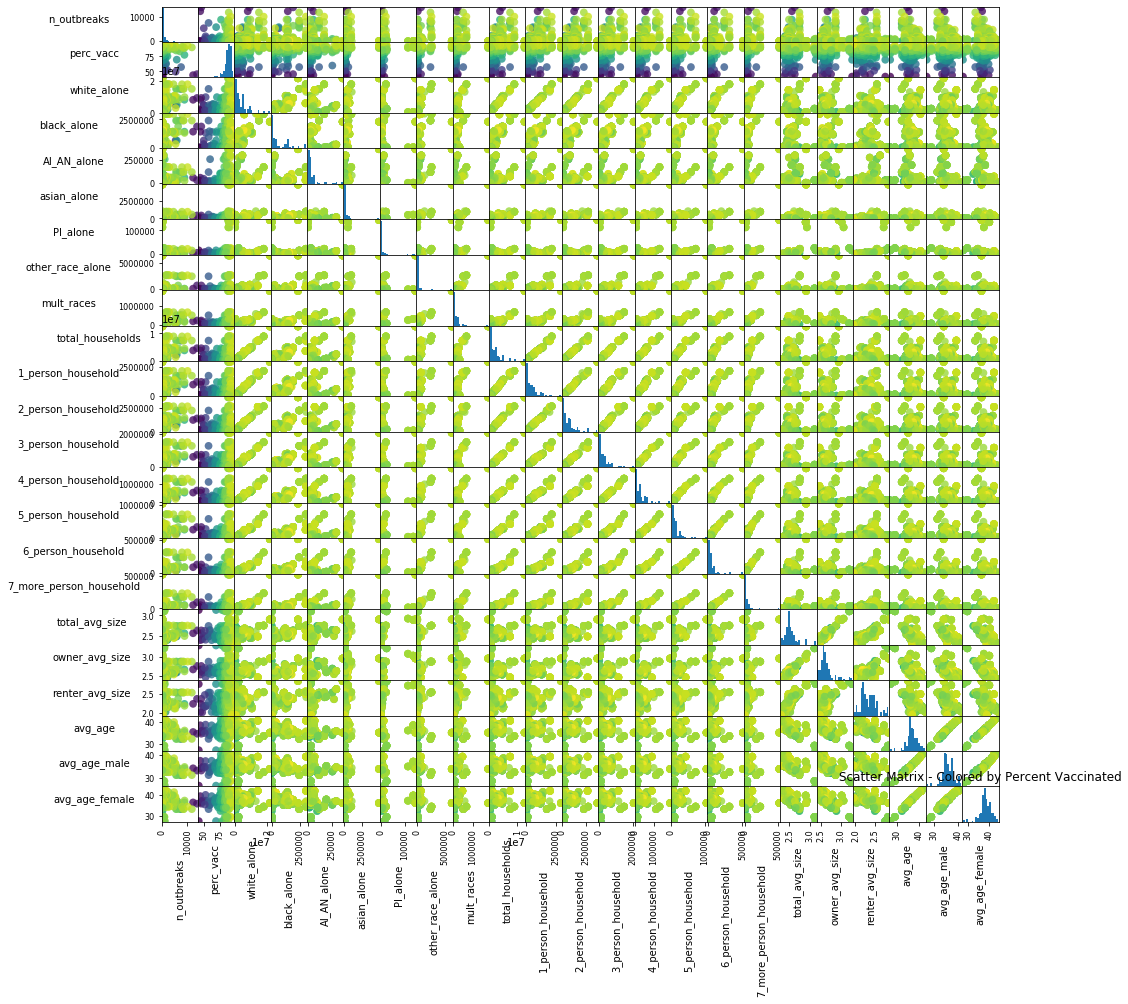

In [20]:
print(df.columns)
a = pd.plotting.scatter_matrix(df,c = df["perc_vacc"], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)

n = len(df.columns)
plt.title("Scatter Matrix - Colored by Percent Vaccinated")
for x in range(n-1):
    for y in range(n-1):
        #print(y)
        # to get the axis of subplots
        ax = a[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

plt.savefig('figures/scatter_matrix.png',dpi=300)
plt.show()

In [21]:
grid.best_estimator_[1]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
import shap
import warnings; warnings.simplefilter('ignore')
#help(shap.KernelExplainer)
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict,X)
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))



Using 575 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


(575, 22)



(575, 22)


In [42]:
index = 5 # the index of the point to explain
print(explainer.expected_value) # we explain class 1 predictions
fig = shap.force_plot(explainer.expected_value, shap_values[1], 
                features = X_test_transformed[index,:],feature_names = X.columns)
#plt.savefig('./figures/shap.png', dpi = 300)
#plt.show()

26022084643.85801


In [28]:
X.columns

Index(['perc_vacc', 'white_alone', 'black_alone', 'AI_AN_alone', 'asian_alone',
       'PI_alone', 'other_race_alone', 'mult_races', 'total_households',
       '1_person_household', '2_person_household', '3_person_household',
       '4_person_household', '5_person_household', '6_person_household',
       '7_more_person_household', 'total_avg_size', 'owner_avg_size',
       'renter_avg_size', 'avg_age', 'avg_age_male', 'avg_age_female'],
      dtype='object')

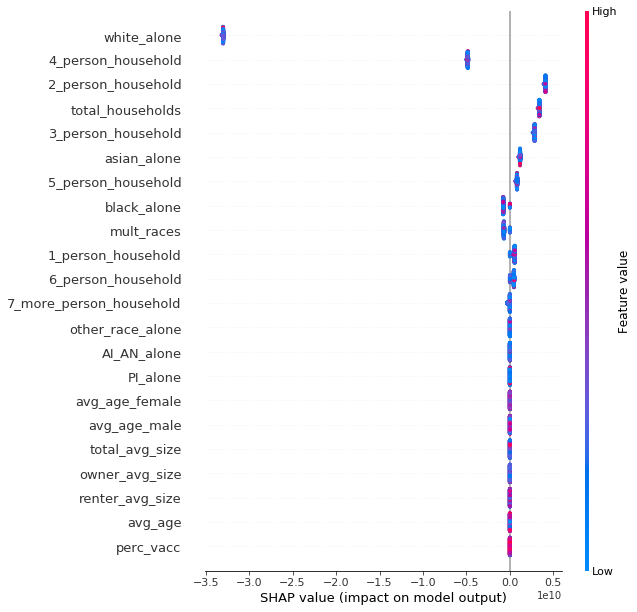

<Figure size 432x288 with 0 Axes>

In [37]:
fig = shap.summary_plot(shap_values, X_test_transformed,feature_names = X.columns,max_display=X.shape[1])
plt.savefig('./figures/scratch.png', dpi = 300)